In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib
import matplotlib.pyplot as plt
import warnings
import csv
import time
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


#data1 = pd.read_csv("winequality-data.csv") 
#data1 = pd.read_csv("MNIST_digit_train.csv") 

from sklearn.datasets import load_digits
digits = load_digits()
 
n_samples = len(digits.images)
features2 = digits.images.reshape((n_samples, -1))



labels2 = digits.target


from sklearn.preprocessing import StandardScaler as ss
scale = ss()

features2 = scale.fit_transform(features2)



(1797, 64)


<Figure size 432x288 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


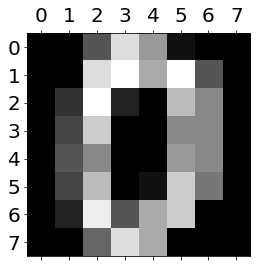

In [2]:

>>> print(digits.data.shape)
(1797, 64)
>>> import matplotlib.pyplot as plt 
>>> plt.gray() 
>>> plt.matshow(digits.images[0]) 
>>> plt.show() 

In [83]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.3, random_state=42)

In [4]:
from sklearn.cluster import KMeans

from sklearn.mixture import BayesianGaussianMixture

from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score,homogeneity_completeness_v_measure

In [5]:
features2.shape

(1797, 64)

# 1.1 Dataset 2

In [10]:
#dataset1

km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}

n_candidates = [i*5+1 for i in range(20)]

clustering_results2 = [["","KM score","KM mutual info","KM rand","KM homogeneity","KM completeness","KM v-measure","KM time",
                       "EM score","EM mutual info","EM rand","EM homogeneity","EM completeness","EM v-measure","EM time"]]

round_start = time.time()
for n in n_candidates:
    
    
    km_dic["n_clusters"] = n
    EM_dic["n_components"] = n
    
    row = [n]
    
    model = KMeans(**km_dic)
    start_time = time.time()
    model.fit(features2)
    preds2 = model.predict(features2)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels2,preds2)   
    row += [-model.score(features2),adjusted_mutual_info_score(labels2,preds2),adjusted_rand_score(labels2,preds2),
            homogeneity,completeness,v_measure,end_time - start_time]    


    model = BayesianGaussianMixture(**EM_dic)
    start_time = time.time()
    model.fit(features2)
    preds2 = model.predict(features2)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels2,preds2)   
    row += [model.score(features2),adjusted_mutual_info_score(labels2,preds2),adjusted_rand_score(labels2,preds2),
            homogeneity,completeness,v_measure,end_time - start_time]    

    print (n)
   
    clustering_results2.append(row)
round_end = time.time()

print ("Total Time:",round_end - round_start)

# output    
with open("1.dataset2_KMeans_clustering.csv",'w') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(clustering_results2)     

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
Total Time: 29.27040696144104


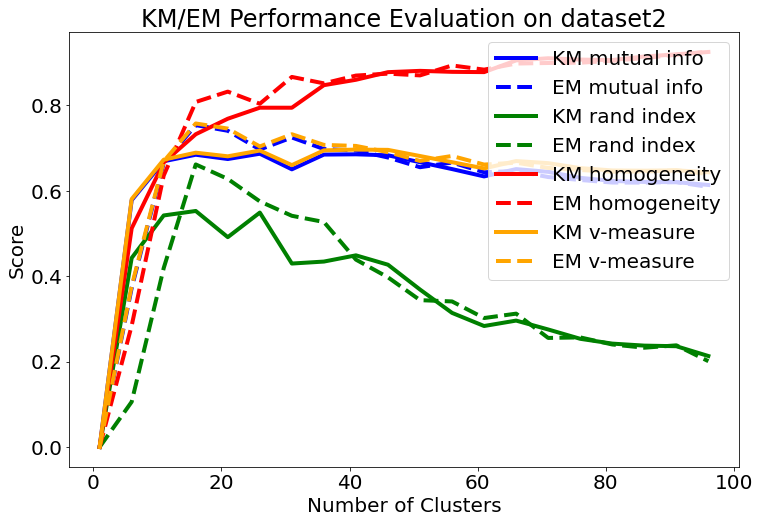

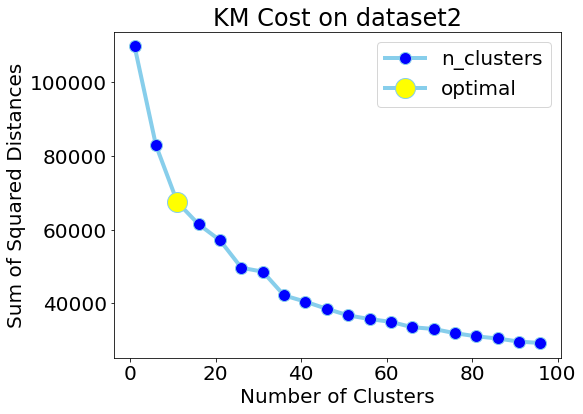

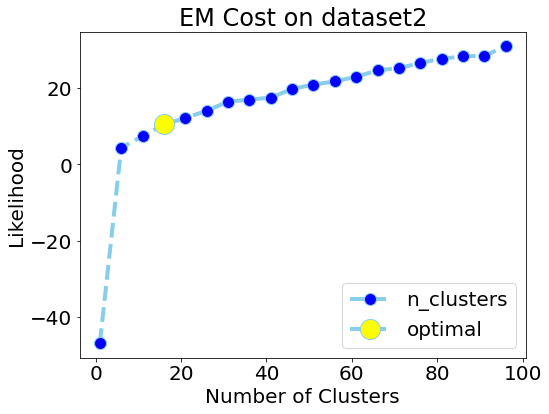

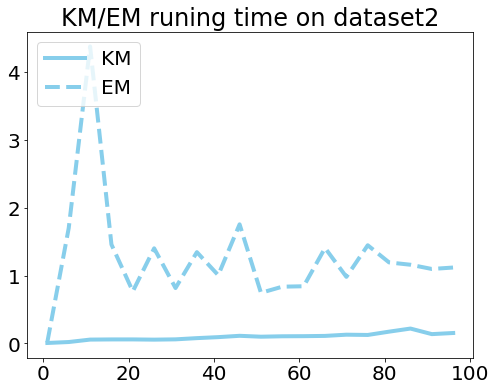

In [112]:
clustering_df2 = pd.read_csv("1.dataset2_KMeans_clustering.csv")
x = clustering_df2.iloc[:,0]
 
# score    
plt.figure(figsize = (12,8))    
plt.plot( x, clustering_df2["KM mutual info"], color='blue', linewidth=4,label = "KM mutual info")
plt.plot( x, clustering_df2["EM mutual info"],linestyle='dashed',color='blue', linewidth=4,label = "EM mutual info")

plt.plot( x, clustering_df2["KM rand"],color='green', linewidth=4,label = "KM rand index")
plt.plot( x, clustering_df2["EM rand"],linestyle='dashed',color='green', linewidth=4,label = "EM rand index")

plt.plot( x, clustering_df2["KM homogeneity"],color='red', linewidth=4,label = "KM homogeneity")
plt.plot( x, clustering_df2["EM homogeneity"],linestyle='dashed',color='red', linewidth=4,label = "EM homogeneity")

plt.plot( x, clustering_df2["KM v-measure"],color='orange', linewidth=4,label = "KM v-measure");
plt.plot( x, clustering_df2["EM v-measure"],linestyle='dashed',color='orange', linewidth=4,label = "EM v-measure");
plt.legend(loc='upper right')
plt.title("KM/EM Performance Evaluation on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Score");

# KM cost/EM cost
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["KM score"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 11,clustering_df2["KM score"][2], marker='o', markerfacecolor='yellow', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("KM Cost on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances");
plt.legend(loc='upper right')


plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["EM score"], marker='o', markerfacecolor='blue', linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 16,clustering_df2["EM score"][3], marker='o', markerfacecolor='yellow',linestyle='dashed', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("EM Cost on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Likelihood");
plt.legend(loc='lower right')


# KM speed/EM speed
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["KM time"],  markersize=12, color='skyblue', linewidth=4,label = "KM")
plt.plot( x,clustering_df2["EM time"], linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "EM");
plt.title("KM/EM runing time on dataset2")
plt.legend(loc='upper left')


# 2. Dimensionality Reduction using PCA,ICA,RP and SVD

In [15]:
from sklearn.decomposition import PCA,FastICA,TruncatedSVD

from sklearn.random_projection import GaussianRandomProjection

from sklearn.metrics.pairwise import cosine_similarity

from tabulate import tabulate

In [ ]:
# 2.1 Choose n_components for PCA 

In [16]:
from kneed import KneeLocator
import numpy.matlib
def find_knee(values):
    # get coordinates of all the points
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T
    # np.array([range(nPoints), values])

    # get the first point
    firstPoint = allCoord[0]
    # get vector between first and last point - this is the line
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec ** 2))

    # find the distance from each point to the line:
    # vector between all points and first point
    vecFromFirst = allCoord - firstPoint

    # To calculate the distance to the line, we split vecFromFirst into two
    # components, one that is parallel to the line and one that is perpendicular
    # Then, we take the norm of the part that is perpendicular to the line and
    # get the distance.
    # We find the vector parallel to the line by projecting vecFromFirst onto
    # the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
    # We project vecFromFirst by taking the scalar product of the vector with
    # the unit vector that points in the direction of the line (this gives us
    # the length of the projection of vecFromFirst onto the line). If we
    # multiply the scalar product by the unit vector, we have vecFromFirstParallel
    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    # distance to line is the norm of vecToLine
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    # knee/elbow is the point with max distance value
    idxOfBestPoint = np.argmax(distToLine)
    return idxOfBestPoint


33


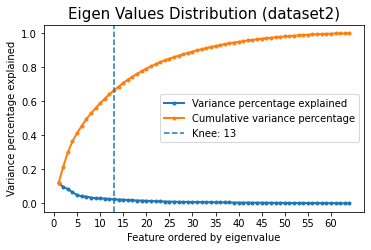

In [37]:
pca = PCA()
temp = pca.fit_transform(features2)

pca_ratio = np.array(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_))
pca_cum_ratio=np.cumsum(pca.explained_variance_ratio_)

tmp_df = pd.Series(data=pca_ratio, index=range(1, min(pca_ratio.shape[0], 500) + 1))
tmp_df_cum = pd.Series(data=pca_cum_ratio, index=range(1, min(pca_ratio.shape[0], 500) + 1))

title="Eigen Values Distribution (dataset2)"
xlabel='Feature ordered by eigenvalue'
ylabel='Variance percentage explained'
plt.close()
plt.figure()
plt.title(title,fontsize=15)
plt.xlabel(xlabel,fontsize=10)
plt.ylabel(ylabel,fontsize=10)
#plt.grid()
plt.tight_layout()

ax = plt.gca()

x_points = tmp_df.index.values
y_points = tmp_df.values
x2_points = tmp_df_cum.index.values
y2_points = tmp_df_cum.values

plt.plot(x_points, y_points, 'o-', linewidth=2, markersize=3,label=ylabel)
plt.plot(x2_points, y2_points, 'o-', linewidth=2, markersize=3,label='Cumulative variance percentage')


min_value = np.min(y_points)
min_point = np.argmin(y_points)
max_value = np.max(y_points)
max_point = np.argmax(y_points)
knee_point = find_knee(y_points)
kl = KneeLocator(x_points, y_points,S=1.0,curve='convex',direction='decreasing')

#ax.axvline(x=min_point, linestyle="--", label="Min: {}".format(int(min_point)))
#ax.axvline(x=max_point, linestyle="--", label="Max: {}".format(int(max_point)))
if kl.knee is not None:
    ax.axvline(x=kl.knee, linestyle="--", label="Knee: {}".format(kl.knee))
else:
    ax.axvline(x=knee_point, linestyle="--", label="Knee: {}".format(knee_point))

ax.set_xticks(tmp_df.index.values, minor=False)
ax.set_xticks(np.arange(0, len(pca_ratio)+1, 5))
ax.set_yticks(np.arange(0, 1.1, 0.2))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc="best",fontsize=10)



print (np.argmax(pca_cum_ratio>0.92))
#print ("Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in pca_res if i >= 0.00001]),features.shape[1]))
#print ("Variance captured: {} %".format(sum([i for i in pca_res if i >= 0.00001])*100.))

# Reconstruct dataset2 from PCA data

In [38]:
from tabulate import tabulate

n_candidates = [int(features2.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_pca_res2 = []
for i,n in enumerate(n_candidates):
    pca = PCA(n)
    temp = pca.fit_transform(features2)
    diff = features2 - pca.inverse_transform(temp)
    reconstruct_pca_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_pca_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤═════════════╤══════════════╤═══════════════╕
│ N components   │         mean │         std │          max │           min │
╞════════════════╪══════════════╪═════════════╪══════════════╪═══════════════╡
│ 6 (10%)        │  1.77932e-17 │ 0.71999     │ 40.2567      │  -7.10622     │
├────────────────┼──────────────┼─────────────┼──────────────┼───────────────┤
│ 12 (20%)       │ -4.94256e-19 │ 0.583905    │ 32.9427      │ -12.3234      │
├────────────────┼──────────────┼─────────────┼──────────────┼───────────────┤
│ 19 (30%)       │  4.07993e-17 │ 0.459804    │ 12.9828      │ -13.5158      │
├────────────────┼──────────────┼─────────────┼──────────────┼───────────────┤
│ 25 (40%)       │ -1.31287e-19 │ 0.376516    │ 11.2533      │ -12.8106      │
├────────────────┼──────────────┼─────────────┼──────────────┼───────────────┤
│ 32 (50%)       │  1.32976e-17 │ 0.297243    │  7.36363     │  -8.27322     │
├────────────────┼──────────────┼─────────────┼─────

# 2.2 choose n_components for ICA 

In [39]:
# bag of features, sorted independence
# picking of features based on independence??
# Kurtosis is defined as the normalized form of the fourth central moment of a distribution: 
# sort by kurtosis!! then choose based on 

from scipy.stats import kurtosis,entropy

# dataset1:84
ica = FastICA(tol = 0.001)
temp = ica.fit_transform(features2)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res2 =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Reduced Dimension: 62 out of 64


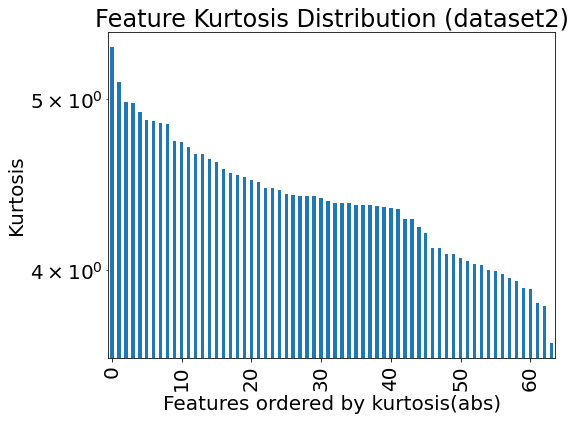

In [41]:
plt.figure(figsize=(8,6))
ax = ica_res2.plot(kind = 'bar',logy = True);
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);


plt.title("Feature Kurtosis Distribution (dataset2)")
plt.xlabel("Features ordered by kurtosis(abs)")
plt.ylabel("Kurtosis")


print ("Reduced Dimension: {} out of {}".format(features2.shape[1]-len([i for i in ica_res2 if i >= 5.]),features2.shape[1]))

In [115]:
ica_res2[:20]

0     5.353459
1     5.115190
2     4.980673
3     4.975286
4     4.919488
5     4.865004
6     4.860395
7     4.845964
8     4.842255
9     4.735771
10    4.730167
11    4.697282
12    4.657468
13    4.654548
14    4.621829
15    4.604376
16    4.563264
17    4.538872
18    4.531881
19    4.518042
dtype: float64

# Reconstructure dataset2 from ICA data 

In [42]:
n_candidates = [int(features2.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_ica_res2 = []
for i,n in enumerate(n_candidates):
    ica = FastICA(n,tol = 0.001)
    temp = ica.fit_transform(features2)
    diff = features2 - ica.inverse_transform(temp)
    reconstruct_ica_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_ica_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


╒════════════════╤══════════════╤═══════════╤═══════════╤════════════╕
│ N components   │         mean │       std │       max │        min │
╞════════════════╪══════════════╪═══════════╪═══════════╪════════════╡
│ 6 (10%)        │  1.22946e-17 │ 0.71999   │ 40.2565   │  -7.10601  │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 12 (20%)       │  3.0891e-18  │ 0.583873  │ 32.4754   │ -12.554    │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 19 (30%)       │  3.36751e-17 │ 0.459739  │ 13.0698   │ -13.5695   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 25 (40%)       │  7.79998e-18 │ 0.376439  │ 11.5146   │ -12.8646   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 32 (50%)       │  1.67758e-17 │ 0.297111  │  7.33465  │  -8.22383  │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 38 (60%)       │  1.2925e-17  │ 0.235099  │  3.96279  │  -3.73454  │
├─────

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


# 2.3 choose n_components for RP

In [43]:
# dataset1:PCA
repeats = []
for i in range(5):
    rp = PCA(n_components = 13)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: -2.7649358053879107e-17
STD of the pairwise differences: 0.04499800579627616


In [44]:
repeats = []
for i in range(5):
    rp = GaussianRandomProjection(n_components = 13)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: -2.4332613698389632e-18
STD of the pairwise differences: 3.0365199011978063


# Reconstruct dataset2 from RP data 

In [45]:
n_candidates = [int(features2.shape[1]*1*(i+1)) for i in range(10)]
reconstruct_rp_res2 = []
for i,n in enumerate(n_candidates):
    rp = GaussianRandomProjection(n)
    temp = rp.fit_transform(features2)
    diff = features2 - np.matmul(temp,rp.components_)
    reconstruct_rp_res2.append(["{} ({}%)".format(n,(i+1)*100),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_rp_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤══════════╤══════════╤═══════════╕
│ N components   │         mean │      std │      max │       min │
╞════════════════╪══════════════╪══════════╪══════════╪═══════════╡
│ 64 (100%)      │ -5.63761e-19 │ 1.0268   │ 13.5494  │ -17.9543  │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 128 (200%)     │ -2.47128e-18 │ 0.675786 │ 11.3237  │ -11.0995  │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 192 (300%)     │  5.56038e-19 │ 0.577012 │  8.07251 │  -6.98339 │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 256 (400%)     │ -1.09856e-18 │ 0.454923 │  7.73888 │  -6.70851 │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 320 (500%)     │ -2.36316e-18 │ 0.438972 │  6.34179 │  -5.84011 │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 384 (600%)     │  9.65344e-19 │ 0.382938 │  7.06626 │  -5.10517 │
├────────────────┼──────────────┼──────────┼────

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 128).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 192).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 256).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarnin

# 2.4 Choose n_components for SVD

30


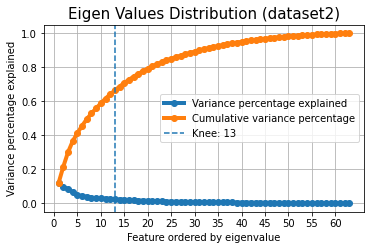

In [51]:
svd = TruncatedSVD(n_components = features2.shape[1]-1)
temp = svd.fit_transform(features2)



svd_ratio = np.array(svd.explained_variance_ratio_/sum(svd.explained_variance_ratio_))
svd_cum_ratio=np.cumsum(svd.explained_variance_ratio_)

tmp_df = pd.Series(data=svd_ratio, index=range(1, min(svd_ratio.shape[0], 500) + 1))
tmp_df_cum = pd.Series(data=svd_cum_ratio, index=range(1, min(svd_ratio.shape[0], 500) + 1))

title="Eigen Values Distribution (dataset2)"
xlabel='Feature ordered by eigenvalue'
ylabel='Variance percentage explained'
plt.close()
plt.figure()
plt.title(title,fontsize=15)
plt.xlabel(xlabel,fontsize=10)
plt.ylabel(ylabel,fontsize=10)
plt.grid()
plt.tight_layout()

ax = plt.gca()

x_points = tmp_df.index.values
y_points = tmp_df.values
x2_points = tmp_df_cum.index.values
y2_points = tmp_df_cum.values

plt.plot(x_points, y_points, 'o-', linewidth=4, markersize=6,label=ylabel)
plt.plot(x2_points, y2_points, 'o-', linewidth=4, markersize=6,label='Cumulative variance percentage')


min_value = np.min(y_points)
min_point = np.argmin(y_points)
max_value = np.max(y_points)
max_point = np.argmax(y_points)
knee_point = find_knee(y_points)
kl = KneeLocator(x_points, y_points,S=1.0,curve='convex',direction='decreasing')

#ax.axvline(x=min_point, linestyle="--", label="Min: {}".format(int(min_point)))
#ax.axvline(x=max_point, linestyle="--", label="Max: {}".format(int(max_point)))
if kl.knee is not None:
    ax.axvline(x=kl.knee, linestyle="--", label="Knee: {}".format(kl.knee))
else:
    ax.axvline(x=knee_point, linestyle="--", label="Knee: {}".format(knee_point))

ax.set_xticks(tmp_df.index.values, minor=False)
plt.legend(loc="best",fontsize=10)
ax.set_xticks(np.arange(0, len(svd_ratio)+1, 5))
ax.set_yticks(np.arange(0, 1.1, 0.2))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


print (np.argmax(pca_cum_ratio>0.90))
#print ("Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in pca_res if i >= 0.00001]),features.shape[1]))
#print ("Variance captured: {} %".format(sum([i for i in pca_res if i >= 0.00001])*100.))

# Reconstruct dataset2 from SVD data 

In [52]:
n_candidates = [int(features2.shape[1]*0.1*(i+1))-1 for i in range(10)]
reconstruct_svd_res2 = []
for i,n in enumerate(n_candidates):
    svd = TruncatedSVD(n)
    temp = svd.fit_transform(features2)
    diff = features2 - svd.inverse_transform(temp)
    reconstruct_svd_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_svd_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤═════════════╤═════════════╤═══════════════╕
│ N components   │         mean │         std │         max │           min │
╞════════════════╪══════════════╪═════════════╪═════════════╪═══════════════╡
│ 5 (10%)        │  2.03881e-18 │ 0.747363    │ 41.999      │  -4.80026     │
├────────────────┼──────────────┼─────────────┼─────────────┼───────────────┤
│ 11 (20%)       │ -7.41384e-19 │ 0.604569    │ 33.5814     │  -9.64939     │
├────────────────┼──────────────┼─────────────┼─────────────┼───────────────┤
│ 18 (30%)       │ -1.58162e-17 │ 0.476014    │ 14.8506     │ -13.5072      │
├────────────────┼──────────────┼─────────────┼─────────────┼───────────────┤
│ 24 (40%)       │ -2.17318e-17 │ 0.388599    │ 11.7831     │ -13.0748      │
├────────────────┼──────────────┼─────────────┼─────────────┼───────────────┤
│ 31 (50%)       │  3.76156e-17 │ 0.30804     │ 11.132      │ -12.4742      │
├────────────────┼──────────────┼─────────────┼─────────────┼───

# 3. Clustering on Dimension Reduction Data 

In [ ]:
# 3.0 comparison 

Training time: 0.13579916954040527 sec


Text(0.5, 1.0, 'PCA on Dataset2')

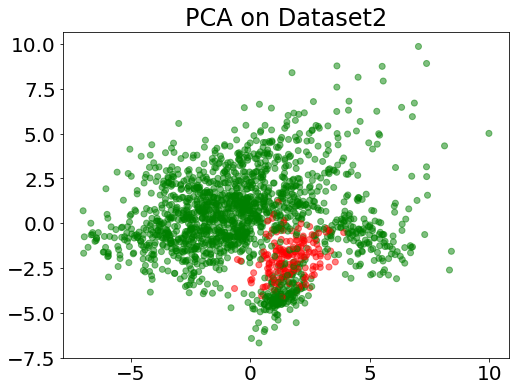

In [116]:
#pca 
start_time = time.time()
temp = PCA(n_components = 13).fit_transform(features2)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels2[i] == 0 else 'g' for i in range(len(labels2))],alpha = 0.5);
plt.title("PCA on Dataset2")


Training time: 0.14283537864685059 sec


Text(0.5, 1.0, 'ICA on Dataset2')

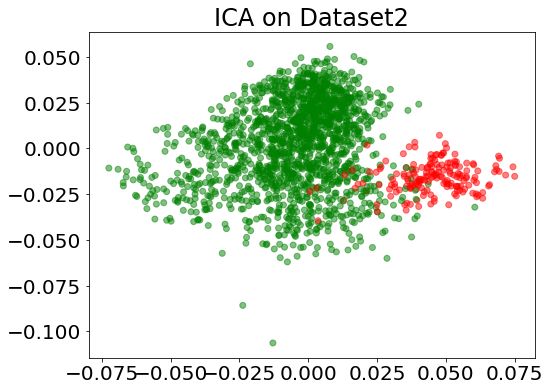

In [117]:
# ica 
start_time = time.time()
temp = FastICA(n_components = 8).fit_transform(features2)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels2[i] == 0 else 'g' for i in range(len(labels2))],alpha = 0.5);
plt.title("ICA on Dataset2")

Training time: 0.009417295455932617 sec


Text(0.5, 1.0, 'RP on Dataset2')

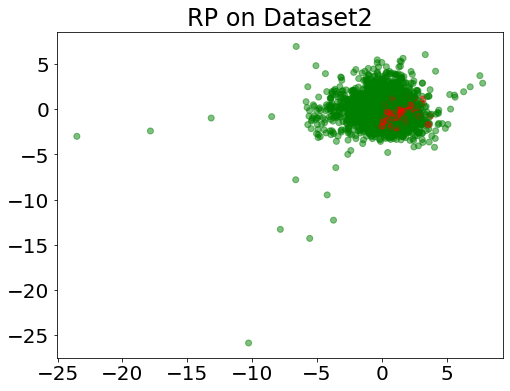

In [118]:
# rp 
start_time = time.time()
temp = GaussianRandomProjection(n_components = 13).fit_transform(features2)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels2[i] == 0 else 'g' for i in range(len(labels2))],alpha = 0.5);
plt.title("RP on Dataset2")

Training time: 0.11078715324401855 sec


Text(0.5, 1.0, 'SVD on Dataset2')

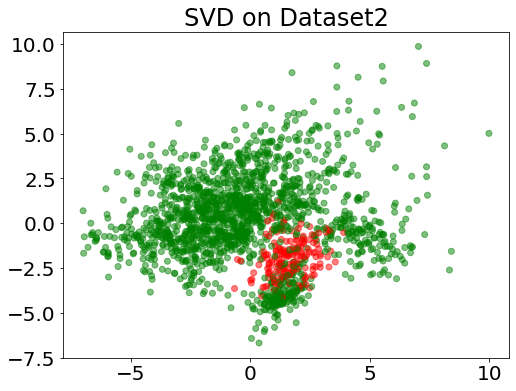

In [119]:
# svd 
start_time = time.time()
temp = TruncatedSVD(n_components = 13).fit_transform(features2)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels2[i] == 0 else 'g' for i in range(len(labels2))],alpha = 0.5);
plt.title("SVD on Dataset2")

In [121]:
#siloutte score:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
# and the mean nearest-cluster distance (b) for each sampl
from sklearn.metrics import silhouette_score

names = ["PCA","ICA","RP ","SVD"]
twoD_data = [PCA(n_components = 13).fit_transform(features2),
FastICA(n_components = 8).fit_transform(features2),
GaussianRandomProjection(n_components = 13).fit_transform(features2),
TruncatedSVD(n_components = 13).fit_transform(features2)]

for name,data in zip(names,twoD_data): 
    print (name," silhouette score:",silhouette_score(data,labels2))

PCA  silhouette score: 0.1544077636835692
ICA  silhouette score: 0.14067660956971453
RP   silhouette score: 0.05816874885128167
SVD  silhouette score: 0.1547713478149474


# 3.1 Visualization on dataset2 

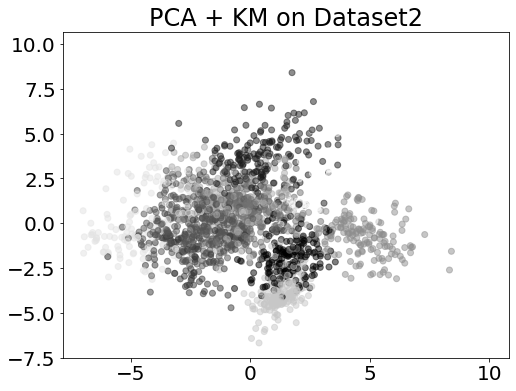

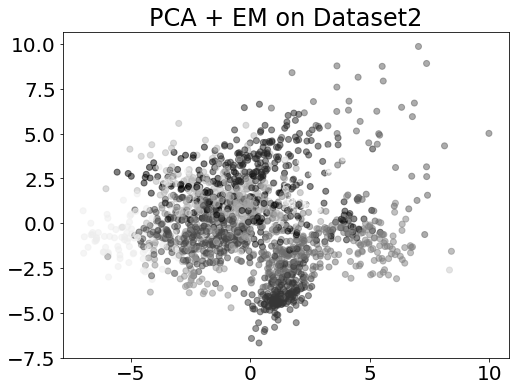

In [65]:

# pca
temp = PCA(n_components = 13).fit_transform(features2)

km_dic = {"n_clusters":10,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("PCA + KM on Dataset2")

EM_dic = {"n_components":15,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("PCA + EM on Dataset2");

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


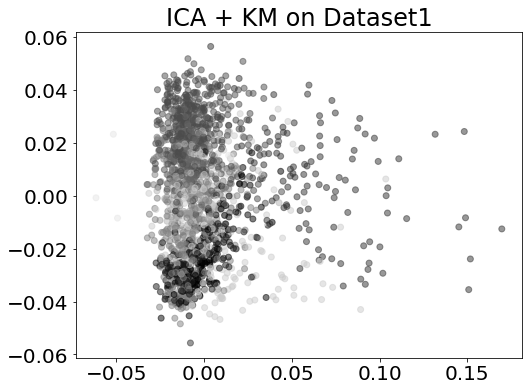

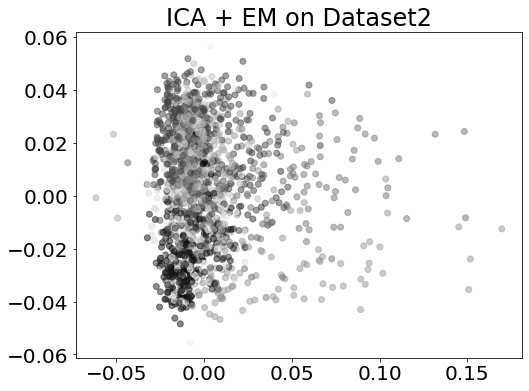

In [68]:
# ica
temp = FastICA(n_components = 13).fit_transform(features2)

km_dic = {"n_clusters":11,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("ICA + KM on Dataset1")

EM_dic = {"n_components":16,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("ICA + EM on Dataset2");

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


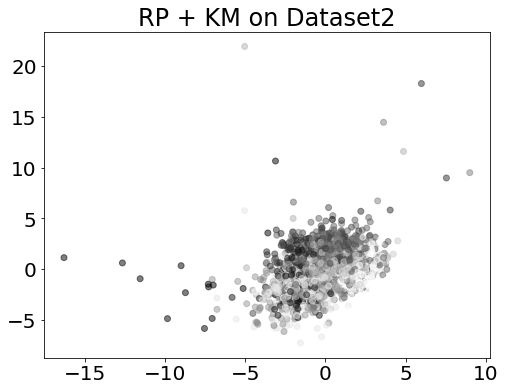

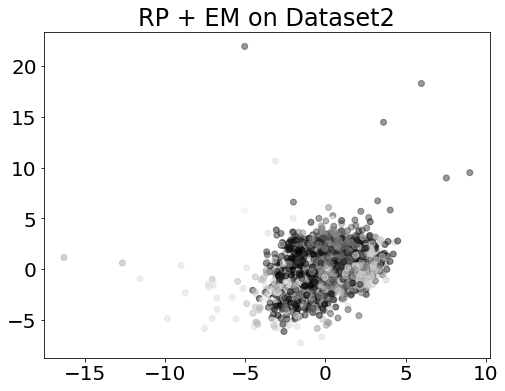

In [70]:
# rp
temp = GaussianRandomProjection(n_components = 13).fit_transform(features2)

km_dic = {"n_clusters":11,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("RP + KM on Dataset2");

EM_dic = {"n_components":16,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("RP + EM on Dataset2");

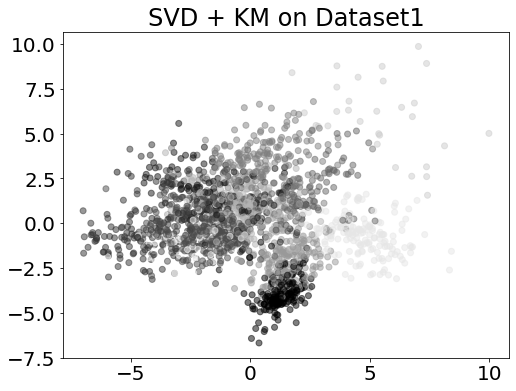

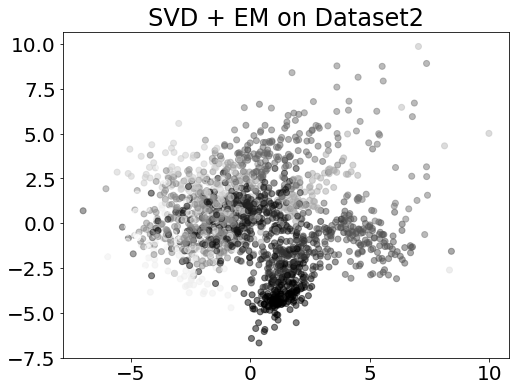

In [71]:
# svd
temp = TruncatedSVD(n_components = 13).fit_transform(features2)

km_dic = {"n_clusters":11,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("SVD + KM on Dataset1");


EM_dic = {"n_components":16,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("SVD + EM on Dataset2");

# 3.2 KMeans and EM Clustering on feature-reduced dataset2

In [122]:
# KM,dataset2
from tabulate import tabulate


km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}
km_dic["n_clusters"] = 10
EM_dic["n_components"] = 10
km = KMeans(**km_dic)
em = BayesianGaussianMixture(**EM_dic)

# optimal n_components
models = [TruncatedSVD(13),GaussianRandomProjection(13),PCA(13),FastICA(8)]
names = ["SVD(13)","RP(13)","PCA(13)","FastICA(8)"]

reclustering_km_res2 = []

    
for i,model in enumerate(models):
    temp = model.fit_transform(features2)
    
    start_time = time.time()
    preds = km.fit_predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
    row = [names[i],-km.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.4f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.4f"%homogeneity),
           float("%0.4f"%(end_time - start_time))]

    reclustering_km_res2.append(row)
    
# original performance as reference
start_time = time.time()
preds = km.fit_predict(features2)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
row = ["Ori(64)",-km.score(features2),np.sum(features2),
       float("%0.4f"%np.std(features2)),
       float("%0.4f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.4f"%homogeneity),
       float("%0.4f"%(end_time - start_time))]

reclustering_km_res2.append(row)

In [123]:
print (tabulate(reclustering_km_res2,headers=['', 'sum(dist)',"sum","std","MutualInfo","homogeneity","time"])    )

              sum(dist)           sum     std    MutualInfo    homogeneity    time
----------  -----------  ------------  ------  ------------  -------------  ------
SVD(13)     34211.3      -2.55795e-13  1.7666        0.674          0.6583  0.0238
RP(13)      56666.5      -1.56319e-13  2.1031        0.35           0.3343  0.0297
PCA(13)     33890        -7.95808e-13  1.7665        0.591          0.5626  0.0302
FastICA(8)      3.28554  -2.58682e-14  0.0236        0.5972         0.5847  0.0232
Ori(64)     69829.6       9.9476e-14   0.9763        0.6615         0.6429  0.0283


In [124]:
# EM,dataset2
reclustering_em_res2 = []
  
for i,model in enumerate(models):
    temp = model.fit_transform(features2)
    
    start_time = time.time()
    preds = em.fit(temp).predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
    row = [names[i],em.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.4f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.4f"%homogeneity),
           float("%0.4f"%(end_time - start_time))]

    reclustering_em_res2.append(row)
    
# original performance as reference
start_time = time.time()
preds = em.fit(features2).predict(features2)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
row = ["Ori(64)",em.score(features2),np.sum(features2),
       float("%0.4f"%np.std(features2)),
       float("%0.4f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.4f"%homogeneity),
       float("%0.4f"%(end_time - start_time))]

reclustering_em_res2.append(row)

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [125]:
print (tabulate(reclustering_em_res2,headers = ["", 'mean(logP)',"sum","std","MutualInfo","homogeneity","time"])    )

              mean(logP)           sum     std    MutualInfo    homogeneity    time
----------  ------------  ------------  ------  ------------  -------------  ------
SVD(13)        -16.4358    3.69482e-13  1.7665        0.6921         0.6682  0.6041
RP(13)         -22.2311    1.7053e-12   2.3171        0.603          0.5769  0.9841
PCA(13)        -16.4297   -9.37916e-13  1.7664        0.7149         0.6879  1.1391
FastICA(8)      22.4628    1.17684e-14  0.0236        0.6378         0.619   0.5238
Ori(64)          4.40142   9.9476e-14   0.9763        0.7214         0.7084  1.0199


# 4. Neuron Network on Reprojected Dataset 2

In [102]:
# ori + 4 reprojected data = 5
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

learner = MLPClassifier(hidden_layer_sizes = (10,))

n = X_train2.shape[0]
train_sizes = [int(0.1*i*n)+1 for i in range(10)] + [n]

models = [TruncatedSVD(13),GaussianRandomProjection(13),PCA(13),FastICA(60)]
names = ["SVD(13)","RP(13)","PCA(13)","FastICA(60)","Ori(64)"]

datasets2 = []
for model in models:
    temp = model.fit_transform(X_train2)
    datasets2.append(temp)
datasets2.append(X_train2)

In [111]:
features2.shape

(1797, 64)

In [126]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

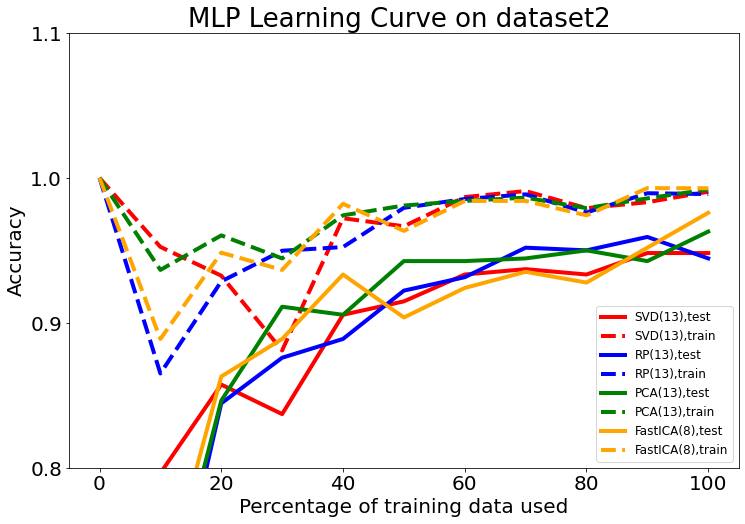

In [127]:
plt.figure(figsize = (12,8))
colors = ['red','blue','green','orange','black']

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2 ',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle='dashed',label = name + ',train',linewidth = 4)
    ax = plt.gca()
    ax.set_yticks(np.arange(0.8, 1.1, 0.1))
    plt.ylim([0.8,1.1])
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 12);   
    

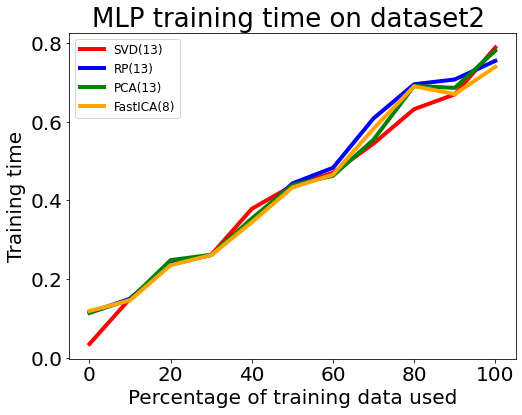

In [128]:
plt.figure(figsize = (8,6))

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP training time on dataset2 ',fontsize = 26)
    plt.plot(x_data,time_res[name],c = color, label = name ,linewidth = 4)
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Training time")
    plt.legend(loc="best",fontsize = 12);   

#  5. Neuron Network on Reprojected features and Clustering features


In [129]:
# ori

models = [TruncatedSVD(13),GaussianRandomProjection(13),PCA(13),FastICA(60)]
names = ["Ori(64)",
         "4 KM clustering labels",
         "4 EM clustering labels",
         "64+4KM","64+4EM","64+4KM+4EM"]

datasets2 = []

KM_clustering_labels = []
EM_clustering_labels = []

for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

for model in models:
    temp = model.fit_transform(X_train2)
    EM_clustering_labels.append(em.fit(X_train2).predict(X_train2))

KM_clustering_labels = np.array(KM_clustering_labels).T
EM_clustering_labels = np.array(EM_clustering_labels).T   

datasets2 = [X_train2,KM_clustering_labels,EM_clustering_labels, 
             np.concatenate([X_train2,KM_clustering_labels],axis=1),
             np.concatenate([X_train2,EM_clustering_labels],axis=1),
             np.concatenate([X_train2,KM_clustering_labels,EM_clustering_labels],axis=1)]

In [109]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

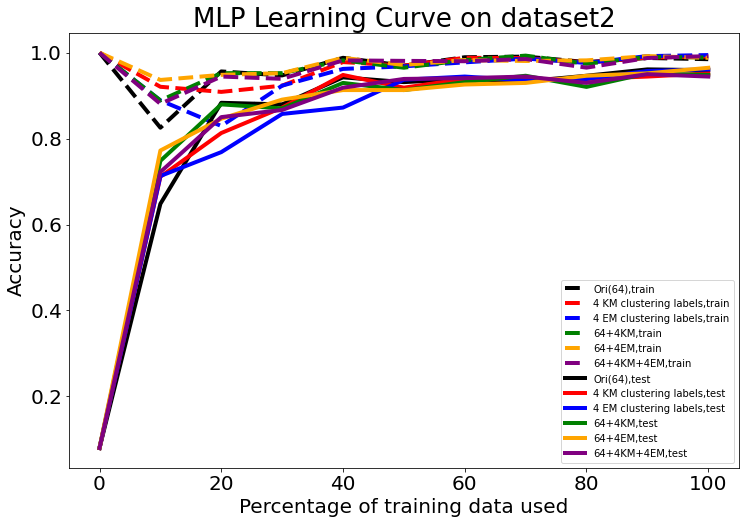

In [110]:
colors = ['black','red','blue','green','orange','purple']

plt.figure(figsize = (12,8))
for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle = 'dashed',label = name + ',train',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

In [93]:
KM_clustering_labels= []
for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

temp_results = {}
temp_res = {}

for i,dataset in  enumerate(KM_clustering_labels):
    temp_results[i] = {"train":[],"test":[]}
    temp_res[i] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        temp_results[i]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        temp_results[i]['test'].append(accuracy_score(y_test,ytest_pred)) 
        temp_res[i].append(end_time - start_time)

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


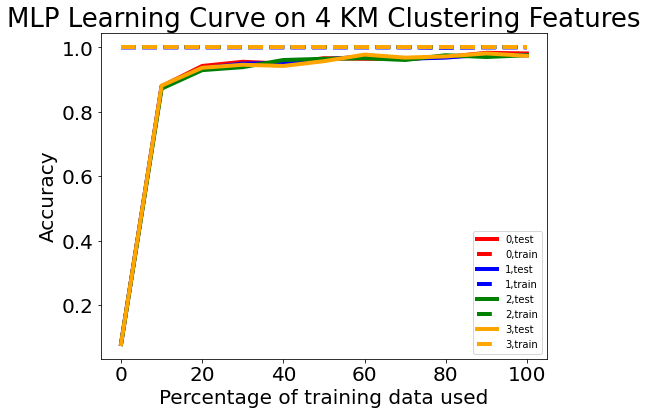

In [130]:
plt.figure(figsize = (8,6))
for i in range(4):
    x_data = [j*10 for j in range(11)]    
    plt.title('MLP Learning Curve on 4 KM Clustering Features',fontsize = 26)
    plt.plot(x_data,temp_results[i]['test'],c = colors[i], label = str(i) + ',test',linewidth = 4)
    plt.plot(x_data,temp_results[i]['train'],c = colors[i], linestyle = 'dashed',label = str(i) + ',train',linewidth = 4)
    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   